In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [3]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [4]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [11]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,500,200)

Vizualize data

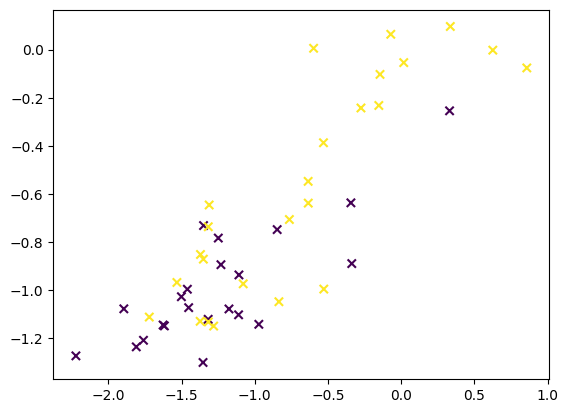

In [12]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [13]:
csp_test_classifiers(4,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_18332\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Epoch 1/15
2/2 [==============================] - 1s 8ms/step - loss: 0.2134 - accuracy: 0.7297
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2109 - accuracy: 0.7568
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.7568
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.7568
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2042 - accuracy: 0.7568
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2021 - accuracy: 0.7568
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1999 - accuracy: 0.7568
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.7568
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.7568
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1938 - accuracy: 0.7838
Epoch 11/15
2/2 [======================

1/1 [==============================] - 0s 112ms/step - loss: 0.2472 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.1806 - accuracy: 0.7568
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1778 - accuracy: 0.7568
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.7568
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1727 - accuracy: 0.7568
Epoch 5/15
2/2 [==============================] - 0s 8ms/step - loss: 0.1701 - accuracy: 0.8378
Epoch 6/15
2/2 [==============================] - 0s 9ms/step - loss: 0.1674 - accuracy: 0.8378
Epoch 7/15
2/2 [==============================] - 0s 8ms/step - loss: 0.1649 - accuracy: 0.8378
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.8378
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.8378
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.6757
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.1679 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2638 - accuracy: 0.5946
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2593 - accuracy: 0.6216
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.6216
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2515 - accuracy: 0.6216
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.6486
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.6486
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.6757
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 0.6757
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 0.7297
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.7297
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1874 - accuracy: 0.7297
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.7297
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1846 - accuracy: 0.7297
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.7297
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.7297
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1804 - accuracy: 0.7297
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.7297
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.7297
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2234 - accuracy: 0.6216
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.6216
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2191 - accuracy: 0.6486
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2168 - accuracy: 0.6486
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2146 - accuracy: 0.6486
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.6486
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2102 - accuracy: 0.6486
Epoch 15/15
1/1 [==============================] - 0s 145ms/step - loss: 0.2481 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3500 - accuracy: 0.4865
Epoch 2/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3454 - accuracy: 0.5135
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.5405
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.5676
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.3413 - accuracy: 0.2000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3774 - accuracy: 0.3243
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3732 - accuracy: 0.3243
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.3243
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.3243
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3613 - accuracy: 0.3514
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3576 - accuracy: 0.3784
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.3784
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.5405
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2366 - accuracy: 0.5405
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.5405
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2311 - accuracy: 0.5676
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.5676
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2258 - accuracy: 0.5676
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2233 - accuracy: 0.5676
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 0.6216
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2183 - accuracy: 0.6216
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2157 - accuracy: 0.6216
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.8378
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.8378
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1281 - accuracy: 0.8378
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1264 - accuracy: 0.8378
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1250 - accuracy: 0.8378
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1234 - accuracy: 0.8378
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1218 - accuracy: 0.8378
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1203 - accuracy: 0.8378
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2489 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3922 - accuracy: 0.2703
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.1668 - accuracy: 0.7297
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1653 - accuracy: 0.7297
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1639 - accuracy: 0.7297
Epoch 15/15
1/1 [==============================] - 0s 142ms/step - loss: 0.1690 - accuracy: 0.9000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2134 - accuracy: 0.6757
Epoch 2/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2098 - accuracy: 0.6757
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.6757
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2038 - accuracy: 0.6757
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2009 - accuracy: 0.6757
Epoch 6/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1981 - accuracy: 0.6757
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.5152 - accuracy: 0.0270
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5104 - accuracy: 0.0270
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.0541
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5012 - accuracy: 0.0541
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.0541
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.0541
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.0541
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.0541
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.0541
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4733 - accuracy: 0.0541
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.7568
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1820 - accuracy: 0.7568
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1804 - accuracy: 0.7568
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1787 - accuracy: 0.7568
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1770 - accuracy: 0.7568
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1753 - accuracy: 0.7568
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1736 - accuracy: 0.7838
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1719 - accuracy: 0.7838
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.7838
Epoch 15/15
1/1 [==============================] - 0s 144ms/step - loss: 0.1836 - accuracy: 0.9000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2473 - accuracy: 0.5676
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.5676
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2420 - accuracy: 0.5676
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.5676
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2765 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3486 - accuracy: 0.3243
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3446 - accuracy: 0.3243
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.3514
Epoch 4/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3368 - accuracy: 0.3784
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.3784
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 124ms/step - loss: 0.3455 - accuracy: 0.1000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.3282 - accuracy: 0.5405
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3256 - accuracy: 0.5405
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.5676
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.5676
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.5676
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3161 - accuracy: 0.5676
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.5676
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.5676
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.5676
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2810 - accuracy: 0.5135
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.5135
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.5135
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.5405
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2702 - accuracy: 0.5405
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2674 - accuracy: 0.5405
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2648 - accuracy: 0.5676
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2622 - accuracy: 0.5676
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.5946
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2568 - accuracy: 0.6216
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2072 - accuracy: 0.6216
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2045 - accuracy: 0.6216
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.6216
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 0.6216
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1964 - accuracy: 0.6216
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2265 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2747 - accuracy: 0.4324
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2714 - accuracy: 0.4324
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2684 - accuracy: 0.4595
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.4595
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 116ms/step - loss: 0.2968 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2351 - accuracy: 0.4595
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2325 - accuracy: 0.4865
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.4865
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.4865
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.4865
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.4865
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.5135
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2183 - accuracy: 0.5135
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2161 - accuracy: 0.5135
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.1795 - accuracy: 0.7297
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.7297
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.7297
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1710 - accuracy: 0.7297
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.7297
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.7297
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1629 - accuracy: 0.7297
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.7568
Epoch 12/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1578 - accuracy: 0.7568
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1554 - accuracy: 0.7838
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.7838
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 0.7838
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.7838
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2005 - accuracy: 0.7838
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1984 - accuracy: 0.7838
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.7838
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2392 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.3764 - accuracy: 0.2162
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.2432
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.2162
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.8108
Epoch 15/15
1/1 [==============================] - 0s 142ms/step - loss: 0.2473 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2629 - accuracy: 0.5676
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.5676
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.5676
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2559 - accuracy: 0.5676
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.5676
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.6216
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.6216
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.6216
Epoch 9/15
2/2 [==============================] 

In [14]:
dwt_test_classifiers(1,'db2',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2630 - accuracy: 0.4865
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2600 - accuracy: 0.5135
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.5135
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.5135
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2533 - accuracy: 0.5135
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 0.5135
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.5135
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.5135
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.5405
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.5676
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.4324
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2891 - accuracy: 0.4324
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.4324
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2851 - accuracy: 0.4324
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2832 - accuracy: 0.4324
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.4595
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2793 - accuracy: 0.4595
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2773 - accuracy: 0.4595
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.4865
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2100 - accuracy: 0.6000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.5946
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.5946
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.5946
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.5946
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2743 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2254 - accuracy: 0.6757
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.6757
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2210 - accuracy: 0.6757
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2191 - accuracy: 0.6757
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.6757
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 125ms/step - loss: 0.2225 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2591 - accuracy: 0.5405
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.5405
Epoch 3/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2523 - accuracy: 0.5405
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2493 - accuracy: 0.5676
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2466 - accuracy: 0.5676
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.5676
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.5946
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.5946
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2365 - accuracy: 0.5946
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3192 - accuracy: 0.4054
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.4054
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.4054
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.4324
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3098 - accuracy: 0.4324
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.4324
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.4324
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.4595
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3012 - accuracy: 0.4595
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.4595
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.5676
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.5676
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.5676
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.5676
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.5676
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2454 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2572 - accuracy: 0.4865
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.4865
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.4865
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.4865
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 108ms/step - loss: 0.3020 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.4595
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.4595
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.4595
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.4595
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3028 - accuracy: 0.4595
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3005 - accuracy: 0.4595
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2981 - accuracy: 0.4595
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2959 - accuracy: 0.4865
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.4865
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.5946
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.5946
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.6216
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.6216
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2326 - accuracy: 0.6216
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2309 - accuracy: 0.6216
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.6216
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.6216
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.6216
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.6486
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.5135
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.5135
Epoch 11/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.5135
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2509 - accuracy: 0.5135
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.5135
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.5135
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.3139 - accuracy: 0.3000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.4324
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.4324
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.4595
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2852 - accuracy: 0.4865
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2444 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.3243
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3636 - accuracy: 0.3514
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.3514
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.3514
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.3514
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.3514
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3513 - accuracy: 0.3514
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.3514
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.5135
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.5135
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.5135
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2361 - accuracy: 0.5405
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2337 - accuracy: 0.5676
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2316 - accuracy: 0.5676
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.5676
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.5676
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.5676
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.5676
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2924 - accuracy: 0.5676
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2904 - accuracy: 0.5676
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.5676
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.5676
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.5676
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.5676
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2813 - accuracy: 0.5676
Epoch 15/15
1/1 [==============================] - 0s 107ms/step - loss: 0.2983 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2472 - accuracy: 0.5135
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.5135
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.5405
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3034 - accuracy: 0.5405
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.2175 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.4324
Epoch 2/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.4595
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.4595
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2807 - accuracy: 0.4595
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.4595
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.4595
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.4865
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2776 - accuracy: 0.4865
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.4865
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2732 - accuracy: 0.4865
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.4865
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.5135
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2673 - accuracy: 0.5135
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2655 - accuracy: 0.5135
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.5135
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.5135
Epoch 11/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.5135
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.4324
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.4324
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3079 - accuracy: 0.4324
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.4324
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.4324
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.4324
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.4324
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2947 - accuracy: 0.4595
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2975 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3185 - accuracy: 0.6216
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.5135
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.5135
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.5135
Epoch 15/15
1/1 [==============================] - 0s 105ms/step - loss: 0.3092 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.5135
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.5135
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.5135
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.5405
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.5405
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.5405
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.5405
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.5405
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.5405
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.5405
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.5676
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.5676
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2390 - accuracy: 0.5676
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.5676
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.5676
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.5676
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.2897 - accuracy: 0.5135
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2876 - accuracy: 0.5135
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.5135
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.5135
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.5135
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.5135
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2769 - accuracy: 0.5135
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.5135
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.5135
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2529 - accuracy: 0.5000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.5135
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.5135
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.5135
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.5135
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3293 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2894 - accuracy: 0.4865
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2868 - accuracy: 0.4865
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2845 - accuracy: 0.4865
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.4865
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.4865
Epoch 6/15
2/2 [=============================

left vs right

In [15]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

In [16]:
csp_test_classifiers(2,time_config, 110, 90)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.4098 - accuracy: 0.2368
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.5263
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4087 - accuracy: 0.5263
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.5263
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4079 - accuracy: 0.5263
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4074 - accuracy: 0.5263
Epoch 7/15
2/2 [==============================] - 0s 13ms/step - loss: 0.4069 - accuracy: 0.5263
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.5263
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4060 - accuracy: 0.5263
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.5263
Epoch 11/15
2/2 [=====================

2/2 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.5789
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.5789
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.5789
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.5789
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2486 - accuracy: 0.5789
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.5789
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2484 - accuracy: 0.5789
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2483 - accuracy: 0.5789
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.5789
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2335 - accuracy: 0.4000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.6053
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2390 - accuracy: 0.6053
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.6053
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.6053
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2228 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3535 - accuracy: 0.3947
Epoch 2/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3530 - accuracy: 0.3158
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3525 - accuracy: 0.3158
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.3158
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3516 - accuracy: 0.3158
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 134ms/step - loss: 0.3956 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2573 - accuracy: 0.3947
Epoch 2/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2570 - accuracy: 0.2895
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.2895
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.2895
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2561 - accuracy: 0.2895
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2559 - accuracy: 0.2895
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2557 - accuracy: 0.2895
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.2895
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.2895
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.8158
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1847 - accuracy: 0.8158
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1845 - accuracy: 0.8158
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.8158
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1842 - accuracy: 0.8158
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.8158
Epoch 11/15
2/2 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.8158
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1836 - accuracy: 0.8158
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.8158
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.8158
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.5263
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2368 - accuracy: 0.5263
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.5263
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2365 - accuracy: 0.5263
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2364 - accuracy: 0.5263
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2151 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.6842
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.5789
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.5789
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.5789
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 109ms/step - loss: 0.2570 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.4211
Epoch 2/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.2105
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2583 - accuracy: 0.2105
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.2105
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.2368
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.2368
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2575 - accuracy: 0.2632
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.2632
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.2632
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.6053
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.6053
Epoch 6/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2751 - accuracy: 0.6053
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.6053
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.6053
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.6053
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.6053
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.6053
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.6053
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2736 - accuracy: 0.6053
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.8158
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.8158
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2118 - accuracy: 0.8158
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2117 - accuracy: 0.8158
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2115 - accuracy: 0.8158
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.8158
Epoch 15/15
1/1 [==============================] - 0s 107ms/step - loss: 0.2558 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2616 - accuracy: 0.4474
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.5263
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.5263
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.2895
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2920 - accuracy: 0.2000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2560 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2558 - accuracy: 0.5526
Epoch 3/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.5526
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.5526
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.5526
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.5526
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.5526
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.5526
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2944 - accuracy: 0.1842
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.1842
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.1842
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.1842
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2927 - accuracy: 0.1842
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2923 - accuracy: 0.1842
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2920 - accuracy: 0.1842
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2916 - accuracy: 0.1842
Epoch 11/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.1842
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2908 - accuracy: 0.1842
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5526
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5526
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.5526
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.5526
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.5526
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5526
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5526
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.4474
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2515 - accuracy: 0.5000
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1984 - accuracy: 0.7895
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1983 - accuracy: 0.7895
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2077 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.7368
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.7368
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2052 - accuracy: 0.7368
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.7368
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.7368
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2049 - accuracy: 0.7368
Epoch 7/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.7368
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 0.5526
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.5789
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2095 - accuracy: 0.5789
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.5789
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2091 - accuracy: 0.5789
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2090 - accuracy: 0.5789
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2088 - accuracy: 0.5789
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2087 - accuracy: 0.5789
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2085 - accuracy: 0.5789
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2083 - accuracy: 0.5789
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3350 - accuracy: 0.4211
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.4211
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3343 - accuracy: 0.4211
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3340 - accuracy: 0.4211
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.4211
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.4211
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.4211
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.4211
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3106 - accuracy: 0.1000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.4211
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2316 - accuracy: 0.8684
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2314 - accuracy: 0.8684
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2312 - accuracy: 0.8684
Epoch 15/15
1/1 [==============================] - 0s 106ms/step - loss: 0.2405 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2292 - accuracy: 0.5526
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2289 - accuracy: 0.7895
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2286 - accuracy: 0.7895
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.7895
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.7895
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.7895
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.2764 - accuracy: 0.2632
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.5263
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2755 - accuracy: 0.4211
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.4211
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.4211
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.4211
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.4211
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.4211
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2734 - accuracy: 0.4211
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.4211
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.5526
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.5526
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.5526
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.5526
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2382 - accuracy: 0.5789
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.5263
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.5263
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.5263
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.5263
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2430 - accuracy: 0.5000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.4211
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2609 - accuracy: 0.4211
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.4211
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.4211
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2397 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.4737
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.7368
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.7632
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 0.7632
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.7632
Epoch 6/15
2/2 [=============================

In [17]:
dwt_test_classifiers(2,'db3',time_config)

Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2581 - accuracy: 0.5789
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.5789
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.5789
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.5789
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.5789
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.5789
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.5789
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.5789
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.5789
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.5789
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.5263
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.5263
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.5263
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2973 - accuracy: 0.5526
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2949 - accuracy: 0.5789
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.5789
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.6053
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2874 - accuracy: 0.6053
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2516 - accuracy: 0.5000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2744 - accuracy: 0.6053
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2720 - accuracy: 0.6053
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.6053
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2670 - accuracy: 0.6316
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.2664 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.5526
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.5526
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.5526
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.5789
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.5789
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 111ms/step - loss: 0.2691 - accuracy: 0.3000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2721 - accuracy: 0.5526
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.5789
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2679 - accuracy: 0.5789
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.5789
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.5789
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.5789
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.5789
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.5789
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.5789
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3301 - accuracy: 0.5526
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3281 - accuracy: 0.5526
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.5526
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.5526
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.5526
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.5526
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.5526
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.5526
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.5526
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.5526
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.4737
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.4737
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2588 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2557 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2058 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3034 - accuracy: 0.4474
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2998 - accuracy: 0.4474
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.4474
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.4474
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 119ms/step - loss: 0.2063 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3208 - accuracy: 0.5526
Epoch 2/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.5526
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.5526
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.5526
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.5526
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.5789
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3088 - accuracy: 0.5789
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.5789
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.5789
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2368 - accuracy: 0.5789
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.5789
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2348 - accuracy: 0.5789
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2338 - accuracy: 0.5789
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2328 - accuracy: 0.5789
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2318 - accuracy: 0.5789
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2308 - accuracy: 0.5789
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2298 - accuracy: 0.5789
Epoch 12/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 0.6053
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.6053
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.4211
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3447 - accuracy: 0.4211
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3430 - accuracy: 0.4211
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.4211
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3398 - accuracy: 0.4211
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.4211
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.3395 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3719 - accuracy: 0.4737
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.4737
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.4737
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.6579
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2525 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.3091 - accuracy: 0.4474
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.4737
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.4737
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.4737
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.4737
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3001 - accuracy: 0.4737
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.4737
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2968 - accuracy: 0.4737
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.4737
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.4737
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.4737
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2871 - accuracy: 0.4737
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2852 - accuracy: 0.4737
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.4737
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.4737
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.4737
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.4737
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2766 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2609 - accuracy: 0.5526
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.5526
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.5526
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.5526
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.5526
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2538 - accuracy: 0.5526
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.5526
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2480 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3300 - accuracy: 0.4474
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.4474
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2806 - accuracy: 0.5263
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.5263
Epoch 15/15
1/1 [==============================] - 0s 128ms/step - loss: 0.2408 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2794 - accuracy: 0.5263
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2772 - accuracy: 0.5526
Epoch 3/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2754 - accuracy: 0.5526
Epoch 4/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2738 - accuracy: 0.5526
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2722 - accuracy: 0.5526
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2707 - accuracy: 0.5526
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.5526
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 7ms/step - loss: 0.2632 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2615 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2570 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2541 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2501 - accuracy: 0.5263
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.2677 - accuracy: 0.5526
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2660 - accuracy: 0.6053
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.6053
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2624 - accuracy: 0.6053
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.6053
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.6053
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2570 - accuracy: 0.6053
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.6316
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2816 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2153 - accuracy: 0.6579
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.7368
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2101 - accuracy: 0.7368
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.7368
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2327 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2631 - accuracy: 0.5263
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.5526
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.5526
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.5526
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.5526
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.5526
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.3799 - accuracy: 0.4474
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.4474
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.4474
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.4474
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.4474
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.4474
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3673 - accuracy: 0.4474
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.4474
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.4474
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.4474
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3007 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2981 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.5263
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.5526
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2687 - accuracy: 0.5000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2649 - accuracy: 0.5263
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.5263
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.5526
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.5789
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2845 - accuracy: 0.3000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3049 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.5000
Epoch 6/15
2/2 [=============================

In [7]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [8]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [9]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [10]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
